In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
data_train = pd.read_csv(r"C:\Users\hp\Desktop\train_loan_prediction.csv")
data_test = pd.read_csv(r"C:\Users\hp\Desktop\test_loan_prediction.csv")

In [33]:
data_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [34]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
nunique = data_train.nunique()
data = data_train[[col for col in data_train if nunique[col] > 1 and nunique[col] <5]] 
data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [37]:
for column in data.columns:
    data_train[column].fillna(method='ffill', inplace=True)

In [38]:
data_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
data_train['Loan_Amount_Term'].mean()

342.0

In [40]:
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].replace(np.nan,data_train['Loan_Amount_Term'].mean())
data_train['LoanAmount'] = data_train['LoanAmount'].replace(np.nan,data_train['LoanAmount'].mean())

In [41]:
data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [43]:
data_train['Loan_Status'] = data_train['Loan_Status'].map({'Y': 1, 'N': 0})
data_train['Gender'] = data_train['Gender'].map({'Male': 1, 'Female': 0})
data_train['Married'] = data_train['Married'].map({'Yes': 1, 'No': 0})
data_train['Dependents'] = data_train['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
data_train['Education'] = data_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data_train['Self_Employed'] = data_train['Self_Employed'].map({'Yes': 1, 'No': 0})
data_train['Property_Area'] = data_train['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})

In [44]:
numeric_column = data_train.select_dtypes(exclude='int').columns
numeric_column


Index(['Loan_ID', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

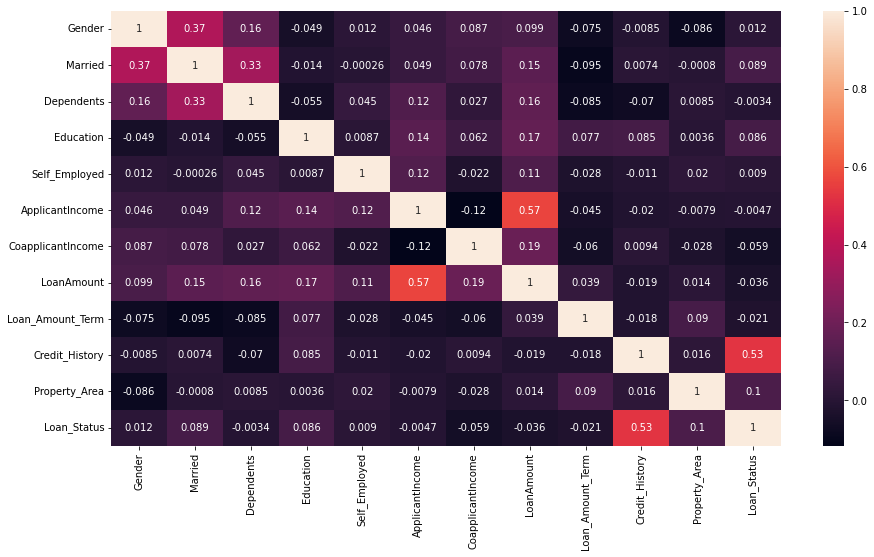

In [45]:
plt.figure(figsize=[15,8])
sns.heatmap(data_train.corr(),annot=True);

In [55]:
X = data_train.drop('Loan_ID', axis =1)

In [56]:
X = data_train.drop('Loan_Status', axis =1)
y = data_train['Loan_Status']

In [61]:
X.fillna(method='ffill', inplace=True)
X 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


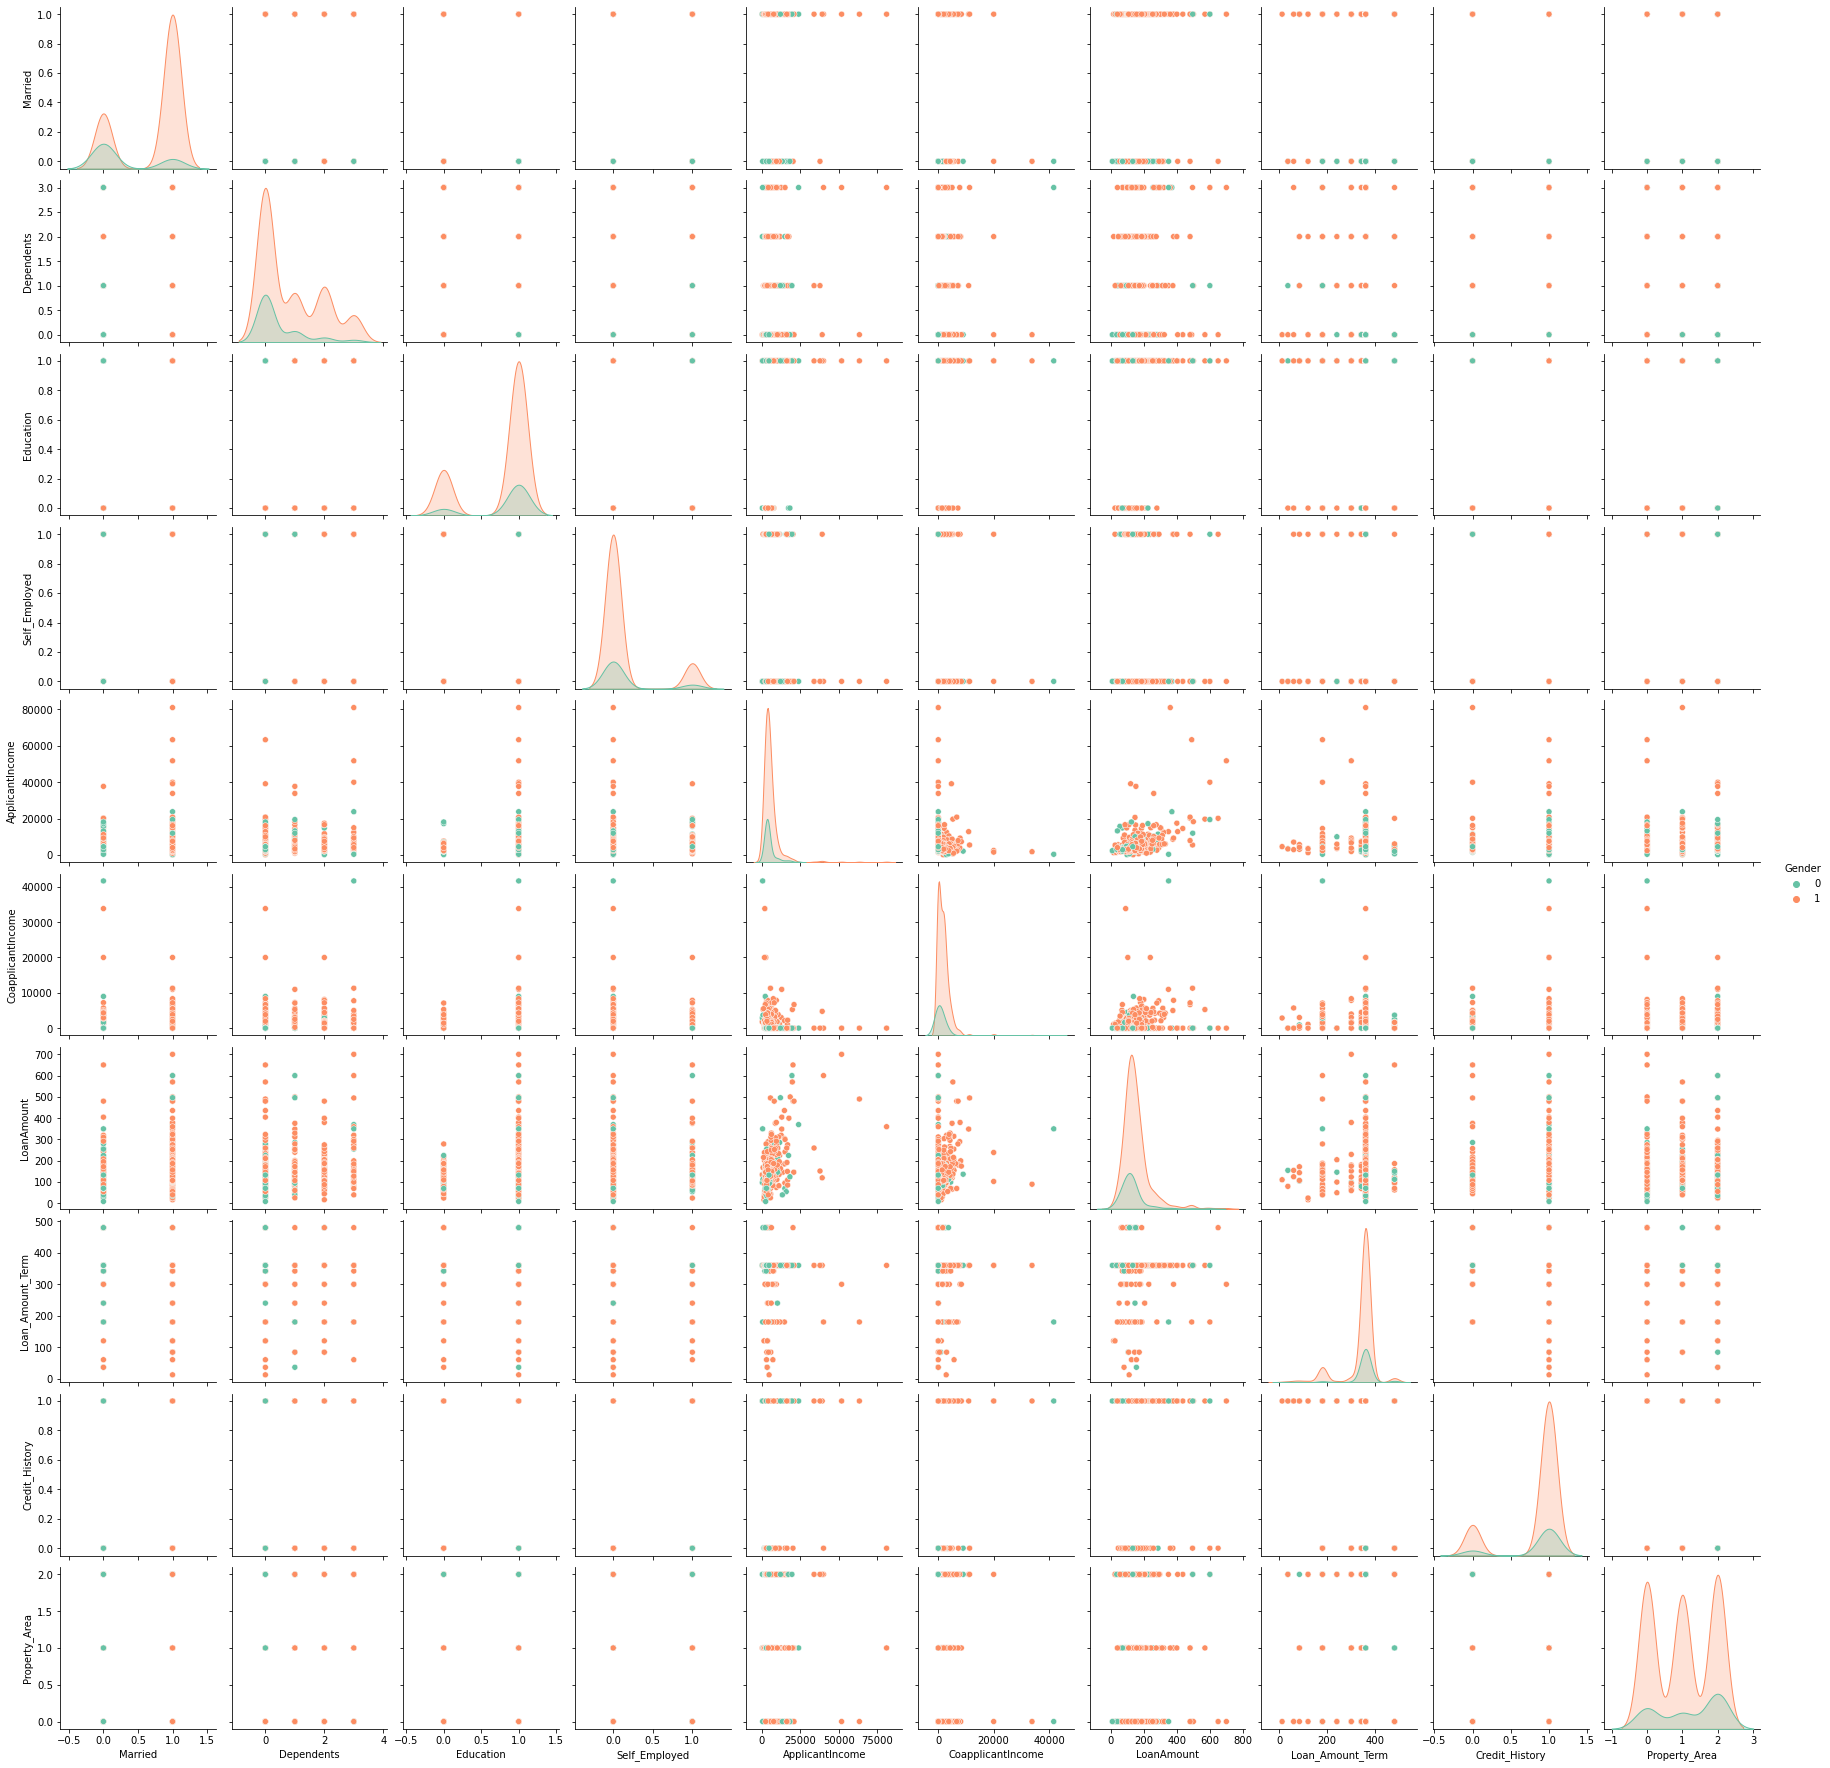

In [82]:
g = sns.pairplot(X, hue="Gender", palette="Set2", diag_kind="kde", height=2.5)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42, stratify=y )

In [63]:
scaler = StandardScaler()
train_scaler = scaler.fit_transform(X_train)
test_scaler = scaler.transform(X_test)

In [64]:
train_scaler

array([[ 0.47265659,  0.73379939,  0.25291106, ...,  0.28737163,
         0.4307749 , -0.06978562],
       [ 0.47265659,  0.73379939,  1.24726221, ...,  0.28737163,
         0.4307749 , -1.25872575],
       [ 0.47265659,  0.73379939,  1.24726221, ...,  0.28737163,
         0.4307749 ,  1.11915452],
       ...,
       [ 0.47265659,  0.73379939, -0.7414401 , ...,  0.28737163,
         0.4307749 ,  1.11915452],
       [ 0.47265659,  0.73379939, -0.7414401 , ...,  0.28737163,
         0.4307749 , -1.25872575],
       [ 0.47265659,  0.73379939,  1.24726221, ...,  0.28737163,
         0.4307749 , -1.25872575]])

In [72]:
log_reg = LogisticRegression()
log_reg.fit(train_scaler, y_train)
y_pred = log_reg.predict(test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72        48
           1       0.84      0.98      0.90       106

    accuracy                           0.86       154
   macro avg       0.89      0.78      0.81       154
weighted avg       0.87      0.86      0.85       154



In [73]:
classifier = SVC(kernel='rbf')
classifier.fit(train_scaler, y_train)

SVC()

In [75]:
y_pred_classifier = classifier.predict(test_scaler)
accuracy_score(y_test, y_pred_classifier)


0.8441558441558441

In [76]:
print(classification_report(y_test, y_pred_classifier))

              precision    recall  f1-score   support

           0       0.93      0.54      0.68        48
           1       0.83      0.98      0.90       106

    accuracy                           0.84       154
   macro avg       0.88      0.76      0.79       154
weighted avg       0.86      0.84      0.83       154



In [77]:
ran_for = RandomForestClassifier()
ran_for.fit(train_scaler, y_train)
y_pred_rf = ran_for.predict(test_scaler)
print("Training", ran_for.score(train_scaler, y_train))
print("Testing", ran_for.score(test_scaler, y_test))

Training 1.0
Testing 0.8311688311688312


In [78]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70        48
           1       0.84      0.92      0.88       106

    accuracy                           0.83       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.83      0.83      0.83       154



In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(train_scaler, y_train)
y_pred_knn = knn.predict(test_scaler)
print("Training", knn.score(train_scaler, y_train))
print("Testing", knn.score(test_scaler, y_test))

Training 0.8043478260869565
Testing 0.8051948051948052


In [81]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        48
           1       0.83      0.91      0.86       106

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.76       154
weighted avg       0.80      0.81      0.80       154

